In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [14]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
inspector = inspect(engine)

In [21]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [23]:
#measurement columns
columns_measurement = inspector.get_columns("measurement")
for columns in columns_measurement:
    print(columns["name"], columns["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [25]:
#station columns
columns_station = inspector.get_columns("station")
for columns in columns_station:
    print(columns["name"], columns["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [27]:
with engine.connect() as conn:
    print(conn.execute(text('SELECT * FROM measurement LIMIT 5')).fetchall())

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0)]


In [29]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

[]

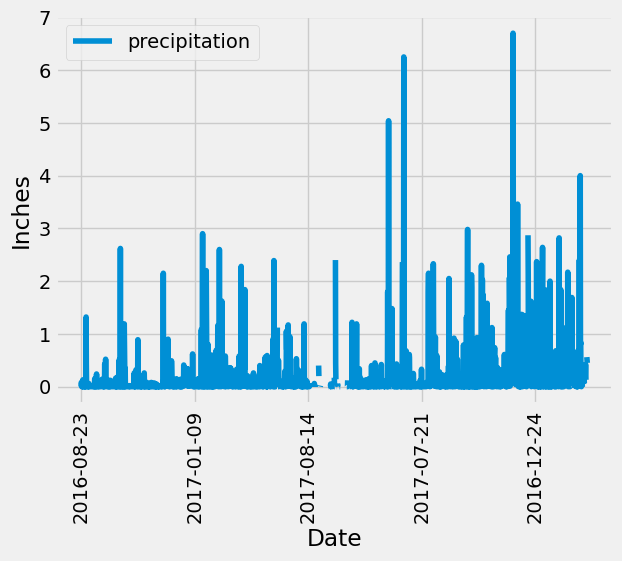

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
recent_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
precip_scores = []
precip_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= recent_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df = pd.DataFrame(precip_scores, columns=["date", "precipitation"])

# Sort the dataframe by date

precip_df.set_index('date', inplace=True)
precip_df.plot(xlabel='Date', ylabel='Inches')
plt.xticks(rotation=90)
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot()

In [93]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [96]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).all()
total_stations

[(9,)]

In [98]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stats = (session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station =='USC00519281').all())
station_stats

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

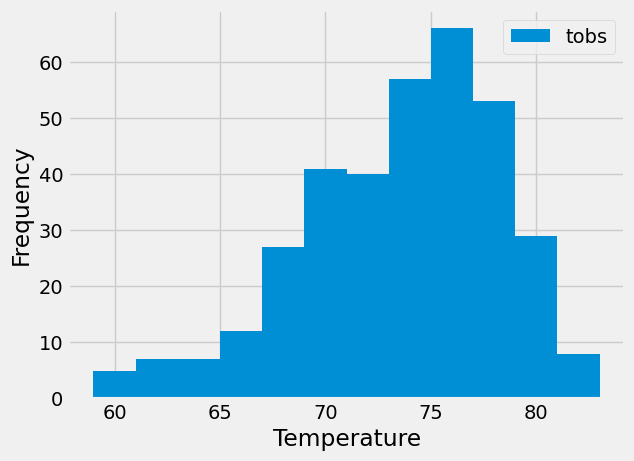

In [102]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_year_query = session.query(measurement.tobs).\
    filter(measurement.station =='USC00519281').\
    filter(measurement.date >= recent_year).all()

station_year_df = pd.DataFrame(station_year_query, columns=['tobs'])
station_year_df.plot.hist(xlabel='Temperature', bins=12)
plt.tight_layout
                            

# Close Session

In [105]:
# Close Session
session.close()